# CONTOUR APPROXIMATION
- Algorithm for reducing the number of points in a curve with a reduced set of points - thus, an approximation. 
- Next example, our goal is to detect only rectangle while ignoring circles/ellipses

In [1]:
import sys
sys.path.append("../../")

In [2]:
import cv2
from cv_imshow import display_image, create_subplot, show_image
import imutils
from matplotlib import pyplot as plt

In [3]:
args = {
    "image1":"../../images/circles_and_squares.png",
    "image2":"../../images/receipt.png"
}

## Find only rectangles
- internal contour approximation algorithm is looking for points to discard. The larger the $\epsilon$ value is, the more points will be discarded. Similarly, the smaller the $\epsilon$ value is, the more points will be kept.

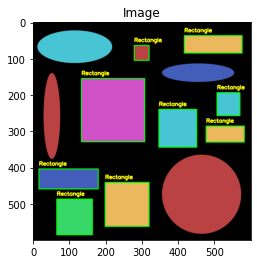

In [4]:
#load the circles and squares image and convert it to  grayscale
image = cv2.imread(args["image1"])
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

#find contours in the image
cnts = cv2.findContours(gray.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)

for c in cnts:
    #appx the contour
    peri = cv2.arcLength(c, True)
    appx = cv2.approxPolyDP(c, 0.01*peri, True)
    #if the appx contour has four points,s then its a rectangle
    if len(appx) == 4:
        cv2.drawContours(image, [c], -1, (0,255,0), 2)
        (x,y,w,h) = cv2.boundingRect(appx)
        cv2.putText(image, "Rectangle", (x,y-10), cv2.FONT_HERSHEY_SIMPLEX, 
                    0.5, (0,255,255),2)
display_image("Image", image) 

## Contour approximation to find the sales receipt
- We apply contour appx and look for rectangle-like regions.
- 

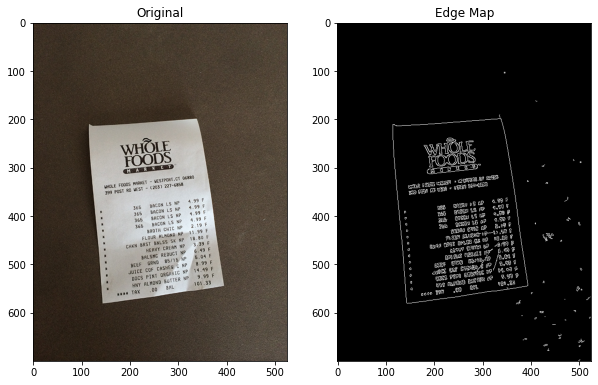

In [5]:
image = cv2.imread(args["image2"])
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
edged = cv2.Canny(gray, 75, 200)
fig = plt.figure(figsize=(10,10))
rows = 1
columns = 2
create_subplot(fig, rows, columns, 1, "Original", image)
create_subplot(fig, rows, columns, 2, "Edge Map", edged)

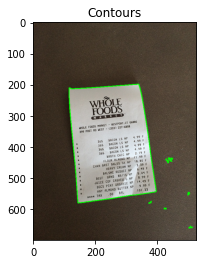

In [6]:
# find contours in image and sort by area size
cnts = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
cnts = sorted(cnts, key=cv2.contourArea, reverse=True)[:7]
image_copy = image.copy()
cv2.drawContours(image_copy, cnts, -1, (0,255,0), 2)
display_image("Contours", image_copy)

original: 279, approx: 4
original: 62, approx: 24
original: 41, approx: 25
original: 18, approx: 18
original: 29, approx: 22
original: 31, approx: 23
original: 26, approx: 24


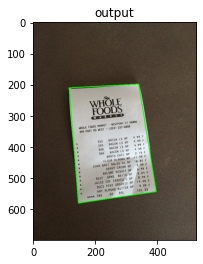

In [7]:
image_copy = image.copy()
for c in cnts:
    #appx the contour and init the contour color
    peri = cv2.arcLength(c, True)
    appx = cv2.approxPolyDP(c, 0.01*peri, True)
    
    #show diff in number of vertices between original and appx contours
    print("original: {}, approx: {}".format(len(c), len(appx)))
    
    #if appx contour has 4 vertices, then we have found our rectangle
    if len(appx) == 4:
        #draw contour
        cv2.drawContours(image_copy, [appx], -1, (0,255,0), 2)
display_image("output", image_copy)